In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import sqlite3
conn = sqlite3.connect("sales_data.db")

cursor = conn.cursor()

cursor.execute("""CREATE TABLE IF NOT EXISTS sales (product TEXT,quantity INTEGER,price REAL)""")
cursor.executemany("""INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)""", 
[('Laptop', 10, 50000),('Mouse', 50, 500), ('Keyboard', 30, 1500),('Monitor', 5, 12000)])

conn.commit()


In [3]:
query = """SELECT product,(quantity), SUM(quantity * price) AS revenue FROM sales
GROUP BY product"""
df = pd.read_sql_query(query, conn)
print("total sales")
print(df)


total sales
    product  quantity    revenue
0  Keyboard        30   180000.0
1    Laptop        10  2000000.0
2   Monitor         5   240000.0
3     Mouse        50   100000.0


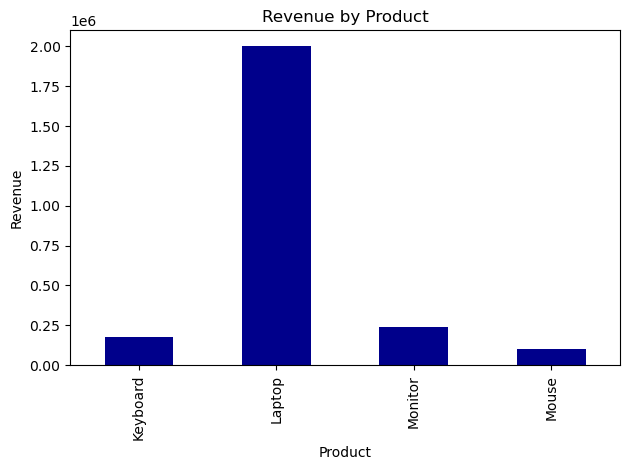

In [13]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='darkblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [5]:
query1="""select product,(quantity*price) AS revenue from sales group by product 
order by revenue desc limit 3 """
df1=pd.read_sql_query(query1,conn)
print("top 3 products with highest revenue")
print(df1)

top 3 products with highest revenue
    product   revenue
0    Laptop  500000.0
1   Monitor   60000.0
2  Keyboard   45000.0


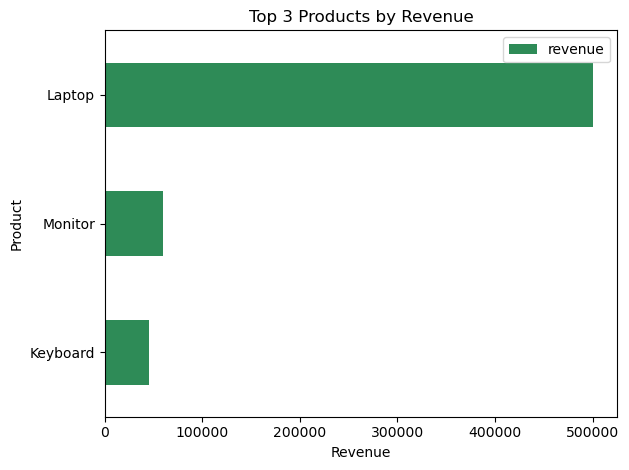

In [6]:
df1.plot(kind='barh', x='product', y='revenue', color='seagreen')

plt.title("Top 3 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


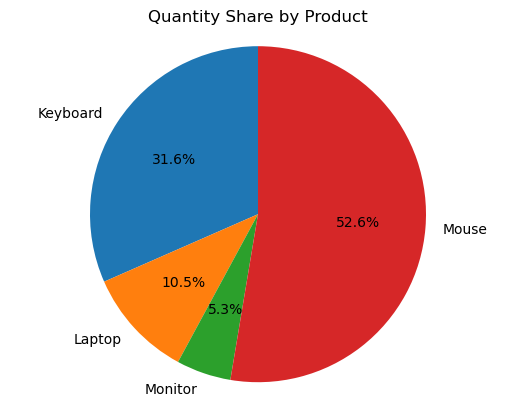

In [12]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity 
FROM sales 
GROUP BY product
"""

df_qty = pd.read_sql_query(query, conn)

plt.pie(df_qty['total_quantity'], labels=df_qty['product'], autopct='%1.1f%%', startangle=90)
plt.title("Quantity Share by Product")
plt.axis('equal')
plt.show()
